### Setup

##### First, import GeoPandas, pandas, and os.  
##### I’ll load the City Council boundaries into a GeoDataFrame directly from the GeoJSON endpoint we got from NYC Planning (url) just to show how to do that. Then I'll follow up in the next cell with loading them as shapefiles. I'll also verify the coordinate reference system (CRS), since Datawrapper requires EPSG 4326 (WGS 84)


In [50]:
import geopandas as gpd
import pandas as pd
import os

url = "https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_City_Council_Districts/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson"
nycc_gdf = gpd.read_file(url)
nycc_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

##### Great! So that's already projected in EPSG:4326. I already know it's 5.5MB, so we'd still have to do simplification to meet Datawrapper's file size limit, but I'll show how with the shapefile below

In [51]:
nycc_gdf = gpd.read_file("data/nycc_25b/nycc.shp")
nycc_gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

##### But it's in EPSG:2263, so let's reproject it into 4326, and define a little function to save it as a file and also print the file size when we are tinkering with simplification later.

In [52]:
def save_geojson_print_size(gdf, output_path):
    gdf.to_file(output_path, driver="GeoJSON")
    size_mb = os.path.getsize(output_path)/(1024 *1024)
    print(f"{output_path} is {size_mb:.2f} MB")
    
output_path = "data/nycc.geojson"
nycc_gdf = nycc_gdf.to_crs("EPSG:4326")
save_geojson_print_size(nycc_gdf, output_path)

data/nycc.geojson is 4.25 MB


So we have to simplify the geometries by more than half. That actually takes a bit of tinkering around. Defining a new gdf on the copy of the original prevents making our iterations lossy (simplifying a geometry that's already been simplified). 
We use `preserve_topology=True` to prevent self-intersecting and invalid geometries

data/nycc.geojson is 0.05 MB


<Axes: >

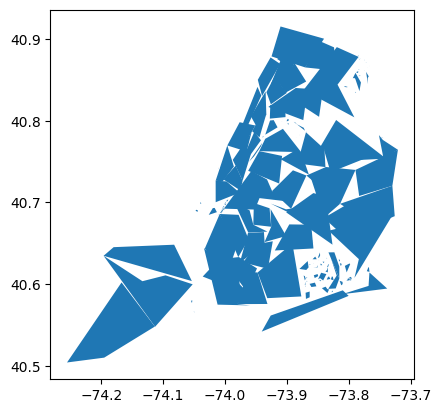

In [53]:
simplified_gdf = nycc_gdf.copy()
simplified_gdf["geometry"] = nycc_gdf["geometry"].simplify(tolerance=10, preserve_topology=True)  # reduce this tolerance
save_geojson_print_size(simplified_gdf, output_path)
simplified_gdf.plot()

I found the best tolerance to be `tolerance = 0.000006`. And that's it. Your geojson is ready to use.

data/nycc.geojson is 1.93 MB


<Axes: >

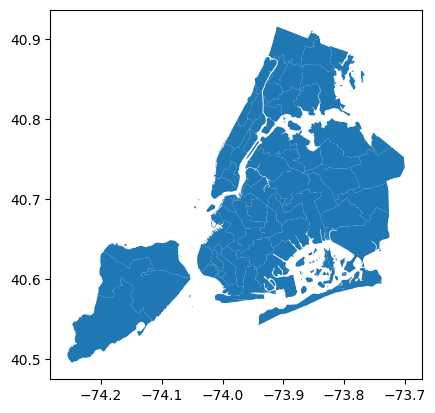

In [54]:
simplified_gdf = nycc_gdf.copy()
simplified_gdf["geometry"] = nycc_gdf["geometry"].simplify(tolerance = 0.000006, preserve_topology=True)  # reduce this tolerance
save_geojson_print_size(simplified_gdf, output_path)
simplified_gdf.plot()